# <span style="color:brown">Project 2 : Ames Housing Data and Kaggle Challenge</span>
---
## <span style="color:Blue">Train Dataset EDA</span>

#### Ryan McDonald, General Assembly
---

### Step 1: Reading the Data 
**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
train = pd.read_csv('../datasets/project_data/train.csv', keep_default_na = False, na_values = [''])

In [3]:
train.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500


In [4]:
train.shape

(2051, 81)

In [5]:
train.dtypes.head(82)

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

---
### Step 2: Cleaning the Data

#### **1. Quick Column Title Formatting**

In [6]:
train.columns = train.columns.str.replace(' ', '_') 
train.columns = train.columns.str.lower()

#### **2. How many missing values are in each column?**

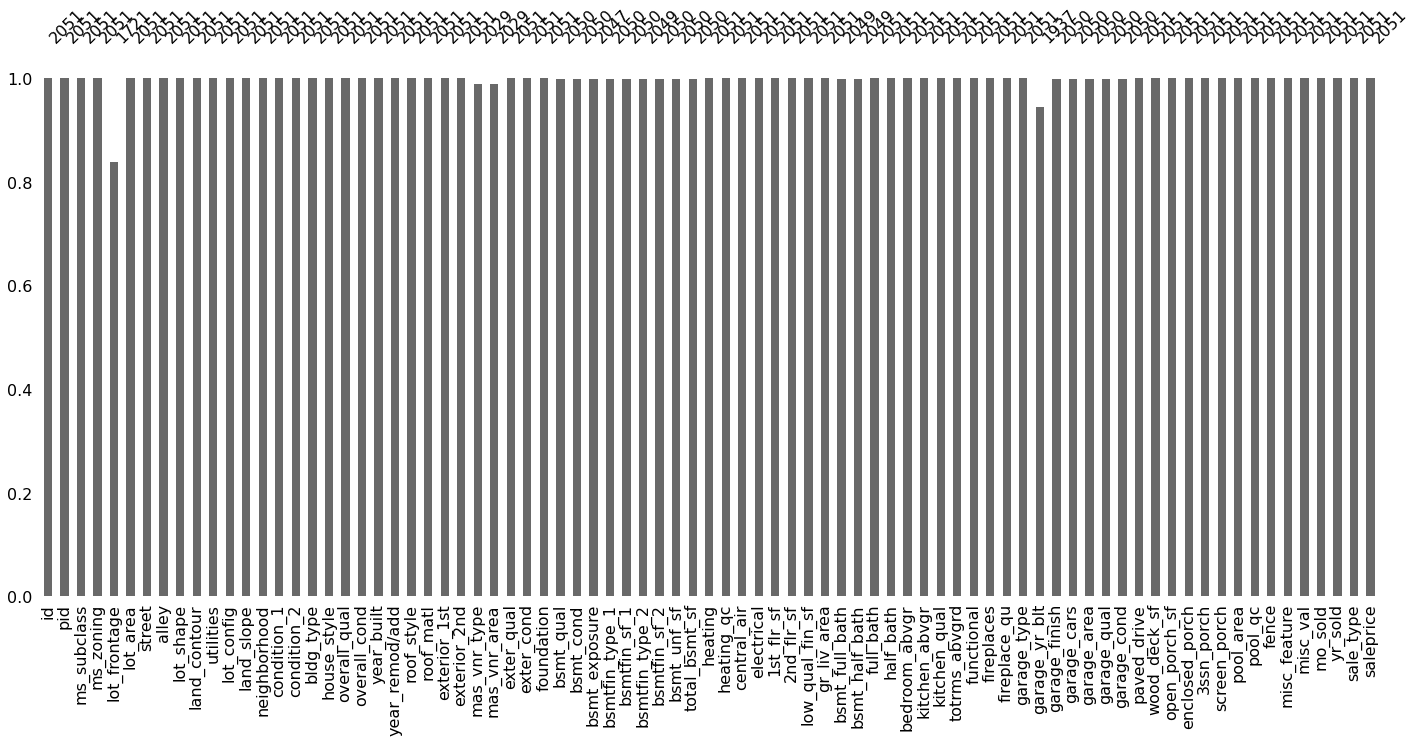

In [7]:
msno.bar(train);

---
#### **Columns of Interest- Missing Values/ NA Values**
    
   * **lot_frontage** (Linear feet of street connected to property) 
         May or may not want to keep this data.. TBD.
   
   
   * **alley** (Type of alley access to property)
         With less than 10% of data, will drop column.
    
    
   * **fireplace_qu** (Fireplace quality)
         With less than 50% of data, and assumed low atribution to total sales, will drop column.
    
    
   * **pool_qc** (Pool quality)
         Little to no data available.  Will drop column.
    
    
   * **fence** (Fence quality)
         With less than 20% of data, will drop column.
   
   
   * **misc_feature** (Miscellaneous feature not covered in other categories)
         Several features (shed/ 2nd Garage add considerable value to property).
         Less than 5% of data.  Will drop rows containing 'Misc Feature' and drop column. 
    
   
   * **misc_val** (value of additional features within "misc_features" catergory.  Will drop once rows are segregated in above comments.
---
#### **Drop Rows and Columns from Analysis**

In [8]:
# Dropping columns
train.drop(columns=['alley', 'fireplace_qu', 'fence', 'pool_qc'], inplace=True)

In [9]:
# Dropping rows where misc_value (from misc_feature) > $2000, then dropping column
train['misc_val'].sort_values(ascending = False).head(20)
train.drop(train[train['misc_val'] > 2000].index, inplace=True)
train.drop(columns=['misc_feature', 'misc_val'], inplace=True)

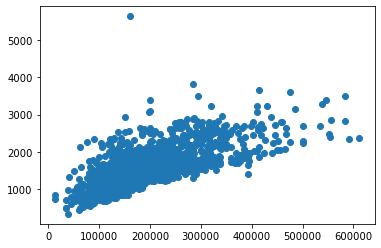

In [10]:
plt.scatter(train['saleprice'], train['gr_liv_area']);

In [11]:
train['gr_liv_area'].sort_values(ascending= False)

# Will delete rows of homes > 4000 sqft.
train.drop(train[train['gr_liv_area'] > 4000].index, inplace=True)
train.drop(train[train['saleprice'] > 500000].index, inplace=True)

---
#### **Deciding how to fill in the remainder of missing data**

In [12]:
train.isnull().sum().sort_values(ascending = False).head(20)

lot_frontage      328
garage_yr_blt     113
mas_vnr_area       22
mas_vnr_type       22
bsmt_exposure       4
bsmtfin_type_2      2
bsmt_full_bath      2
bsmt_half_bath      2
bsmt_unf_sf         1
garage_finish       1
bsmt_cond           1
bsmtfin_type_1      1
bsmtfin_sf_1        1
bsmtfin_sf_2        1
total_bsmt_sf       1
bsmt_qual           1
garage_cars         1
garage_area         1
garage_qual         1
garage_cond         1
dtype: int64

**1. lot_frontage data clean up**
    
   - **Removing outliers ( >300 ft)**
   - **Replacing NaN values with category median of '68'**
   

In [13]:
train['lot_frontage'].sort_values(ascending= False).head()

1335    313.0
1875    200.0
441     195.0
1263    174.0
1224    160.0
Name: lot_frontage, dtype: float64

In [14]:
# Removing homes with 'lot_frontage' > 300
train.drop(train[train['lot_frontage'] > 300].index, inplace=True)

In [15]:
train[['lot_frontage']].describe()

,lot_frontage
count,1698.000000
mean,68.636631
std,21.705274
min,21.000000
25%,58.000000
50%,68.000000
75%,80.000000
max,200.000000


In [16]:
np.nan_to_num(train['lot_frontage'], copy=False, nan=68);

In [17]:
train.isnull().sum().sort_values(ascending = False).head(20)

garage_yr_blt     113
mas_vnr_area       22
mas_vnr_type       22
bsmt_exposure       4
bsmtfin_type_2      2
bsmt_full_bath      2
bsmt_half_bath      2
bsmt_unf_sf         1
garage_finish       1
bsmt_cond           1
bsmtfin_type_1      1
bsmtfin_sf_1        1
bsmtfin_sf_2        1
total_bsmt_sf       1
bsmt_qual           1
garage_cars         1
garage_qual         1
garage_cond         1
garage_area         1
exterior_1st        0
dtype: int64

**2. Garage data clean up**
    
   - **garage_finish, garage_yr_blt, garage_qual, garage_cond, garage_type, garage_cars, garage_area** 
   
   - **Filling empty values with NA.  These homes have no garage reported** 

In [18]:
train['garage_finish'].unique()


array(['RFn', 'Unf', 'Fin', 'NA', nan], dtype=object)

In [19]:
train['garage_finish'].fillna('NA', inplace = True)
train['garage_finish'].unique()

array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object)

In [20]:
train['garage_yr_blt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

In [21]:
train['garage_yr_blt'].fillna(0, inplace = True)
train['garage_yr_blt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,    0., 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

In [22]:
train['garage_qual'].isnull().sum()

1

In [23]:
train['garage_qual'].fillna('NA', inplace = True)
train['garage_qual'].unique()

array(['TA', 'Fa', 'NA', 'Gd', 'Ex', 'Po'], dtype=object)

In [24]:
train['garage_cond'].isnull().sum()

1

In [25]:
train['garage_cond'].fillna('NA', inplace = True)
train['garage_cond'].unique()

array(['TA', 'Fa', 'NA', 'Po', 'Gd', 'Ex'], dtype=object)

In [26]:
train['garage_type'].isnull().sum()

0

In [27]:
train['garage_type'].fillna('NA', inplace = True)
train['garage_type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'NA', '2Types',
       'CarPort'], dtype=object)

In [28]:
train['garage_cars'].isnull().sum()

1

In [29]:
train['garage_cars'].fillna(0, inplace = True)
train['garage_cars'].unique()

array([2., 1., 3., 0., 4., 5.])

In [30]:
train['garage_area'].isnull().sum()

1

In [31]:
train['garage_area'].fillna(0, inplace = True)
train['garage_area'].unique();

**3. Basement info clean up**
    
   - **bsmt_exposure, bsmtfin_type_2, bsmt_qual, bsmt_cond, bsmtfin_type_1, bsmt_full_bath, bsmt_half_bath, bsmt_unf_sf, bsmtfin_sf_1,bsmtfin_sf_2, total_bsmt_sf** 
   - **Filling empty values with NA. basmt_bath info with 0. These homes have no basement reported** 

In [32]:
train['bsmt_exposure'].isnull().sum()

4

In [33]:
train['bsmt_exposure'].fillna('NA', inplace = True)
train['bsmt_exposure'].unique()

array(['No', 'Gd', 'Av', 'NA', 'Mn'], dtype=object)

In [34]:
train['bsmtfin_type_2'].isnull().sum()

2

In [35]:
train['bsmtfin_type_2'].fillna('NA', inplace = True)
train['bsmtfin_type_2'].unique()

array(['Unf', 'Rec', 'NA', 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [36]:
train['bsmt_qual'].isnull().sum()

1

In [37]:
train['bsmt_qual'].fillna('NA', inplace = True)
train['bsmt_qual'].unique()

array(['TA', 'Gd', 'Fa', 'NA', 'Ex', 'Po'], dtype=object)

In [38]:
train['bsmt_cond'].isnull().sum()

1

In [39]:
train['bsmt_cond'].fillna('NA', inplace = True)
train['bsmt_cond'].unique()

array(['TA', 'Gd', 'NA', 'Fa', 'Po', 'Ex'], dtype=object)

In [40]:
train['bsmtfin_type_1'].isnull().sum()

1

In [41]:
train['bsmtfin_type_1'].fillna('NA', inplace = True)
train['bsmtfin_type_1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', 'NA', 'BLQ', 'LwQ'], dtype=object)

In [42]:
train['bsmt_full_bath'].isnull().sum()

2

In [43]:
train['bsmt_full_bath'].fillna(0, inplace = True)
train['bsmt_full_bath'].unique()

array([0., 1., 2., 3.])

In [44]:
train['bsmt_half_bath'].isnull().sum()

2

In [45]:
train['bsmt_half_bath'].fillna(0, inplace = True)
train['bsmt_half_bath'].unique()

array([0., 1., 2.])

In [46]:
train['bsmt_unf_sf'].isnull().sum()

1

In [47]:
train['bsmt_unf_sf'].fillna(0, inplace = True)
train['bsmt_unf_sf'].unique();

In [48]:
train['bsmtfin_sf_1'].isnull().sum()

1

In [49]:
train['bsmtfin_sf_1'].fillna(0, inplace = True)
train['bsmtfin_sf_1'].unique();

In [50]:
train['bsmtfin_sf_2'].isnull().sum()

1

In [51]:
train['bsmtfin_sf_2'].fillna(0, inplace = True)
train['bsmtfin_sf_2'].unique();

In [52]:
train['total_bsmt_sf'].isnull().sum()

1

In [53]:
train['total_bsmt_sf'].fillna(0, inplace = True)
train['total_bsmt_sf'].unique();

**4. Masonry Veneer info clean up**
    
   - **mas_vnr_area, mas_vnr_type** 
   - **Filling empty values in mas_vnr_area with '0'. mas_vnr_type with 'None'.**
   - **These homes don't have any masonry attributes reported** 

In [54]:
train['mas_vnr_area'].isnull().sum()

22

In [55]:
train['mas_vnr_area'].fillna(0, inplace = True)
train['mas_vnr_area'].unique();

In [56]:
train['mas_vnr_type'].isnull().sum()

22

In [57]:
train['mas_vnr_type'].fillna('None', inplace = True)
train['mas_vnr_type'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [58]:
train.isnull().sum().sort_values(ascending = False).head(20)

saleprice         0
overall_cond      0
year_remod/add    0
roof_style        0
roof_matl         0
exterior_1st      0
exterior_2nd      0
mas_vnr_type      0
mas_vnr_area      0
exter_qual        0
exter_cond        0
foundation        0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_sf_1      0
year_built        0
overall_qual      0
bsmtfin_sf_2      0
dtype: int64

### No more missing values!

In [59]:
train.shape

(2026, 75)

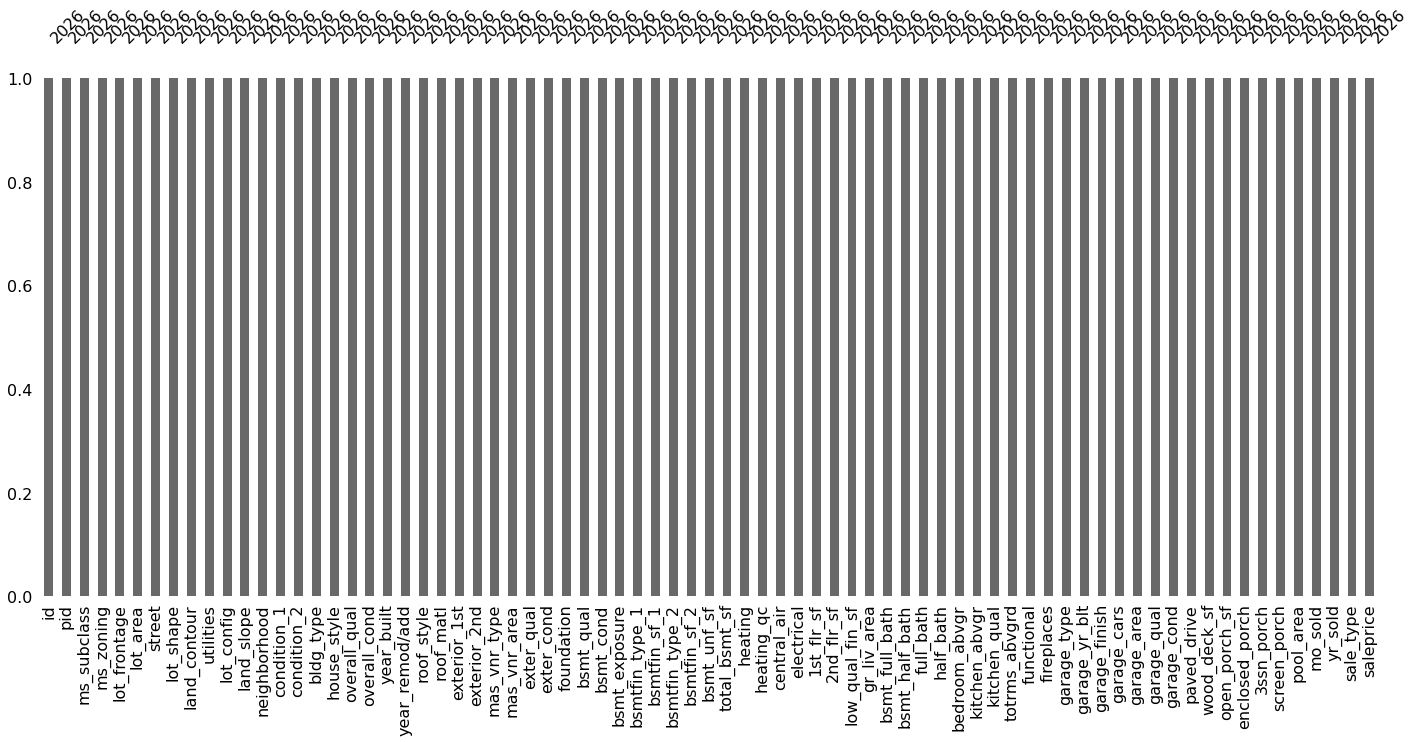

In [60]:
msno.bar(train);

In [61]:
pd.set_option('display.max_rows', 80)
train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
bsmtfin_sf_2       float64
b

In [62]:
train['saleprice'].astype(float)

0       130500.0
1       220000.0
2       109000.0
3       174000.0
4       138500.0
          ...   
2046    298751.0
2047     82500.0
2048    177000.0
2049    144000.0
2050    189000.0
Name: saleprice, Length: 2026, dtype: float64

### Step 3. Checking Distributions of Continuous Data

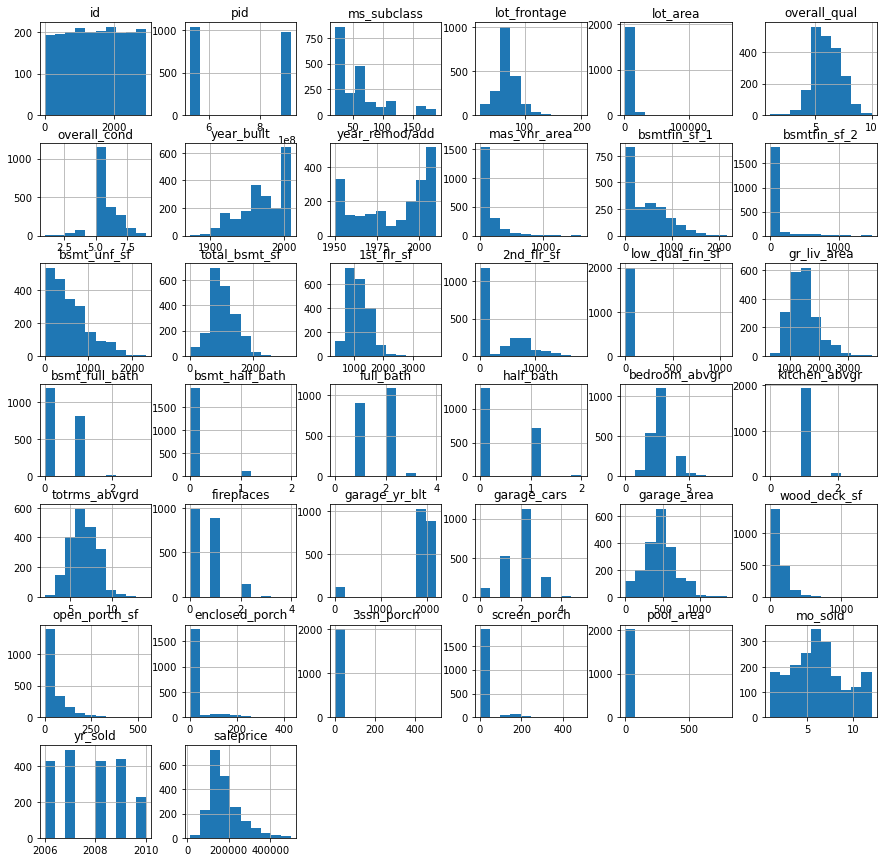

In [63]:
train.hist(figsize=(15, 15));

**Will exlude commercial, agricultural, and industrial-zoned properties for the analysis**

In [64]:
train['ms_zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [65]:
train.drop(train[train['ms_zoning'] == 'C (all)'].index, inplace=True)
train.drop(train[train['ms_zoning'] == 'A (agr)'].index, inplace=True)
train.drop(train[train['ms_zoning'] == 'I (all)'].index, inplace=True)
train['ms_zoning'].unique()

array(['RL', 'RM', 'FV', 'RH'], dtype=object)

**Will exlude lot sizes greater than 50,000 sqft**

<AxesSubplot:xlabel='lot_area'>

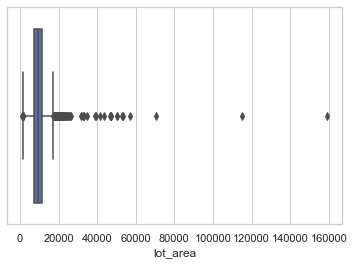

In [66]:
sns.set_theme(style="whitegrid")
sns.boxplot(x= 'lot_area', data= train)

In [67]:
train['lot_area'].sort_values(ascending= False)

471     159000
694     115149
1854     70761
745      57200
1052     53227
         ...  
1447      1484
787       1477
53        1476
1544      1470
1510      1300
Name: lot_area, Length: 2004, dtype: int64

In [68]:
train.drop(train[train['lot_area'] > 50000].index, inplace=True)

**Only a few home have low quality finished sq-ft listed as an attribute.  Will drop column for simplicity.**

In [69]:
train['low_qual_fin_sf'].value_counts().head()

0      1964
80        3
205       2
697       1
53        1
Name: low_qual_fin_sf, dtype: int64

<AxesSubplot:xlabel='low_qual_fin_sf'>

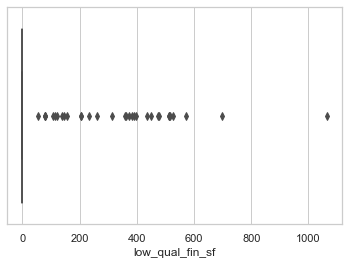

In [70]:
sns.set_theme(style="whitegrid")
sns.boxplot(x= 'low_qual_fin_sf', data= train)

In [71]:
train.drop(columns=['low_qual_fin_sf'], inplace=True)

**ID and PID are not neccessary for analysis.  These numbers are arbitrary and do not have any correlation to other feature/target variables.**

In [72]:
train.drop(columns=['id', 'pid'], inplace=True)

In [73]:
train.shape

(1996, 72)

**Will drop homes with wood_deck_sf greater than 800 to remove outliers**

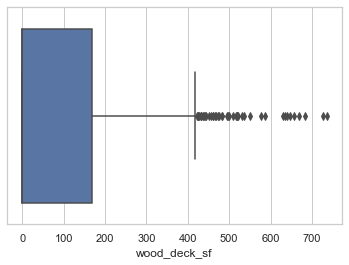

In [74]:
train.drop(train[train['wood_deck_sf'] > 800].index, inplace=True)
sns.set_theme(style="whitegrid")
sns.boxplot(x= 'wood_deck_sf', data= train);

### Remainder of continuous variable values/distribution appear to be in-line with realistic expectations.  Will carry through with analysis

### Step 4. Analyze Non-Numerical Data for Features Determination



In [75]:
train.drop(columns=['utilities'], inplace=True)

In [76]:
train_object = train.select_dtypes(include=['object'])
train_object.head().T

,0,1,2,3,4
ms_zoning,RL,RL,RL,RL,RL
street,Pave,Pave,Pave,Pave,Pave
lot_shape,IR1,IR1,Reg,Reg,IR1
land_contour,Lvl,Lvl,Lvl,Lvl,Lvl
lot_config,CulDSac,CulDSac,Inside,Inside,Inside
land_slope,Gtl,Gtl,Gtl,Gtl,Gtl
neighborhood,Sawyer,SawyerW,NAmes,Timber,SawyerW
condition_1,RRAe,Norm,Norm,Norm,Norm
condition_2,Norm,Norm,Norm,Norm,Norm
bldg_type,1Fam,1Fam,1Fam,1Fam,1Fam


**Neighborhood will prove to be a big factor for buyers.  Neighborhood appears to have a strong correlation to sales price, which makes sense.**
    
   -**Determining which neighborhoods are more valuable**
  
   -**There is a 3x increase in mean sales price in the 'Top' neighborhoods.**

In [77]:
train.groupby('neighborhood', as_index=True)['saleprice'].mean().sort_values(ascending = False)

neighborhood
NridgHt    312681.777778
NoRidge    310587.617021
StoneBr    289357.781250
GrnHill    280000.000000
Veenker    245356.250000
Timber     243460.022222
Somerst    227183.900000
ClearCr    205328.727273
Crawfor    205035.514286
CollgCr    202315.636872
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187053.883721
Mitchel    168479.375000
NAmes      145377.208469
Blueste    144566.666667
NPkVill    140476.470588
Landmrk    137000.000000
Sawyer     136701.745455
SWISU      134758.875000
Edwards    130126.542857
BrkSide    127022.697368
OldTown    125278.006173
IDOTRR     114216.765957
BrDale     103371.052632
MeadowV    100231.250000
Name: saleprice, dtype: float64

In [78]:
train['neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'NWAmes', 'Veenker', 'MeadowV', 'SWISU',
       'NoRidge', 'ClearCr', 'Blmngtn', 'IDOTRR', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

### To start, all categorical columns will get dummies applied.  Determination as to which features are to be utilized for modeling will occur on sheet 2 (02_Preprocessing_Features_Engineering).

### Save the cleaned data!

In [79]:
train.to_csv('../datasets/project_data/clean_train.csv', index = False)
